In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [3]:
im = cv2.imread('../input_data/sample.png')/255
im.shape

(32, 32, 3)

In [4]:
kernel_size = 5
c1_kernel_count = 6
c3_kernel_count = 16
c5_kernel_count = 120
if len(im.shape) > 2:
    channels = im.shape[2]
else:
    channels = 1
poolsize = 2
stride = 2

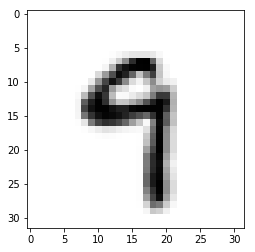

In [5]:
plt.imshow(im)

In [50]:
def tanh(x):
    return (2/(1+np.exp(-2*x))) - 1

In [7]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [8]:
def ReLu(feature):
    h, w = feature.shape
    for i in range(h):
        for j in range(w):
            if feature[i,j] < 0:
                feature[i,j] = 0
    return feature

In [9]:
def convolution(image, kernel,bias):
    i_size, _ = image.shape
    k_size, _ = kernel.shape
    o_size = i_size - k_size +1
    fimage = np.zeros((o_size,o_size))
    for i in range(o_size):
        for j in range(o_size):
            temp = image[i:k_size+i, j:k_size+j]
            fimage[i,j] = np.sum(np.multiply(temp,kernel)) + bias
    return fimage

In [10]:
def maxpool(image, poolsize, stride):
    i_size, _ = image.shape
    o_size = int(np.floor((i_size - poolsize)/stride) + 1)
    fimage = np.zeros((o_size,o_size))
    for i in range(0,o_size,stride):
        for j in range(0,o_size,stride):
            temp = image[i:poolsize+i, j:poolsize+j]
            fimage[i,j] = np.amax(temp)
    return fimage

# First convolution with ReLu activation  C1

In [12]:
c1_kernels = np.random.rand(c1_kernel_count,kernel_size,kernel_size,channels)
c1_bias = np.random.rand(c1_kernel_count)

In [17]:
c1_featuremaps = []
for i in range(c1_kernel_count):
    i_size, _,_ = im.shape
    k_size, _ ,_= c1_kernels[i].shape
    o_size = i_size - k_size +1
    conv = np.zeros((o_size,o_size))
    for j in range(channels):
        conv += convolution(im[:,:,j],c1_kernels[i][:,:,j], c1_bias[i])
    conv = ReLu(conv)
    c1_featuremaps.append(conv)
c1_featuremaps = np.asarray(c1_featuremaps)
print(c1_featuremaps.shape)

(6, 28, 28)


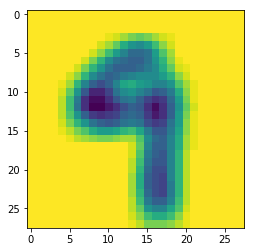

In [19]:
plt.imshow(c1_featuremaps[4].astype('int'))

# Maxpooling/subsampling/downsampling on convolution layer output S2

In [22]:
s2_featuremaps = []
for i in range(len(c1_featuremaps)):
    maxp = maxpool(c1_featuremaps[i],poolsize,stride)
    s2_featuremaps.append(maxp)
s2_featuremaps = np.asarray(s2_featuremaps)
print(s2_featuremaps.shape)

(6, 14, 14)


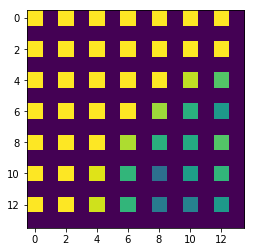

In [24]:
plt.imshow(s2_featuremaps[4].astype('int'))

In [26]:
c3_kernels = np.random.rand(c3_kernel_count,kernel_size,kernel_size,len(s2_featuremaps))
c3_bias = np.random.rand(c3_kernel_count)

# Second Convolution layer with ReLu activation C3

In [30]:
c3_featuremaps = []
i_size, _= s2_featuremaps[0].shape
k_size, _ ,_= c3_kernels[0].shape
o_size = i_size - k_size +1
for i in range(c3_kernel_count):
    conv = np.zeros((o_size,o_size))
    for j in range(len(s2_featuremaps)):
        for k in range(channels):
            conv += convolution(s2_featuremaps[j],c3_kernels[i][:,:,k], c3_bias[i])
    conv = ReLu(conv)
    c3_featuremaps.append(conv)
c3_featuremaps = np.asarray(c3_featuremaps)
print(c3_featuremaps.shape)

(16, 10, 10)


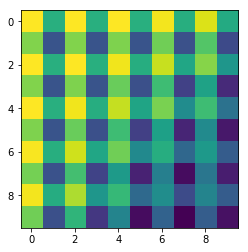

In [31]:
plt.imshow(c3_featuremaps[4].astype('int'))

# Second maxpool layer S4

In [32]:
s4_featuremaps = []
for i in range(len(c3_featuremaps)):
    maxp = maxpool(c3_featuremaps[i],poolsize,stride)
    s4_featuremaps.append(maxp)
s4_featuremaps = np.asarray(s4_featuremaps)
print(s4_featuremaps.shape)

(16, 5, 5)


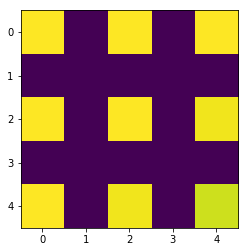

In [156]:
plt.imshow(s4_featuremaps[4].astype('int'))

# Third Convolution layer C5

In [33]:
c5_kernels = np.random.rand(c5_kernel_count,kernel_size,kernel_size,len(s4_featuremaps))
c5_bias = np.random.rand(c5_kernel_count)

In [40]:
c5_featuremaps = []
i_size, _= s4_featuremaps[0].shape
k_size, _ ,_= c5_kernels[0].shape
o_size = i_size - k_size +1
for i in range(c5_kernel_count):
    conv = np.zeros((o_size,o_size))
    for j in range(len(s4_featuremaps)):
        for k in range(channels):
            conv += convolution(s4_featuremaps[j],c5_kernels[i][:,:,k], c5_bias[i])
    conv = ReLu(conv)
    c5_featuremaps.append(conv)
c5_featuremaps = np.asarray(c5_featuremaps)
print(c5_featuremaps.shape)

(120, 1, 1)


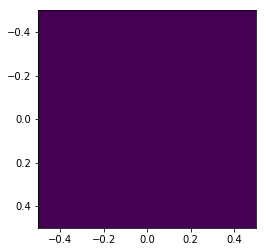

In [41]:
plt.imshow(c5_featuremaps[4].astype('int'))

In [64]:
c5_featuremaps = np.asarray(c5_featuremaps).flatten()
c5_featuremaps.shape

(120,)

# Fully connected layer F6

In [51]:
f6_weights = np.random.rand(c5_featuremaps.shape[0],84)
f6_bias = np.random.rand(84)
f6_out = tanh(np.dot(c5_featuremaps,f6_weights) + f6_bias)
# f6_out = np.dot(c5_featuremaps,f6_weights) + f6_bias

In [62]:
f6_out.shape

(84,)

# Output layer

In [54]:
out_weights = np.random.normal(0,0.001,size=(84,10))
out_bias = np.random.normal(0,0.001,size=(10))
output = softmax(np.dot(f6_out,out_weights) + out_bias)

In [55]:
print(output)
print(len(output))

[0.09874535 0.10014417 0.09945531 0.10040046 0.1007218  0.10062907
 0.10060573 0.10113653 0.09922703 0.09893455]
10


In [60]:
print("Network:\n")
print(im.shape,'-->',c1_featuremaps.shape,'-->',s2_featuremaps.shape,'-->',c3_featuremaps.shape,'-->',s4_featuremaps.shape)
print('-->',c5_featuremaps.shape,'-->',f6_out.shape,'-->',output.shape)

Network:

(32, 32, 3) --> (6, 28, 28) --> (6, 14, 14) --> (16, 10, 10) --> (16, 5, 5)
--> (120,) --> (84,) --> (10,)
